[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/assignment-2B/blob/master/Linear_1FC.ipynb)

In [1]:
!wget "https://github.com/rajagopalmotivate/assignment-2B/raw/master/data_2class.pkl"


Redirecting output to ‘wget-log.2’.


train
test


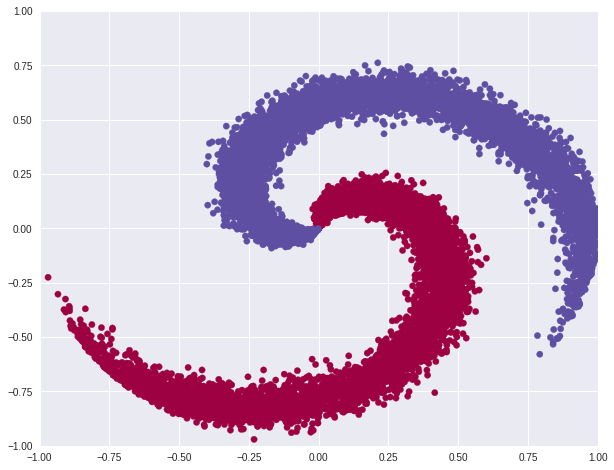

In [2]:
# cross entropy softmax, Linerar

import pickle
import numpy as np
import matplotlib.pyplot as plt

# WORKS WELL , Single FC layer 

#----
#from datain import *

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes


with open('data_2class.pkl', 'rb') as f:
    mydictionary =  pickle.load(f)

for akeyname in mydictionary:
    print (akeyname )

testX, testY = mydictionary["test"]
trainX, trainY = mydictionary["train"]

X = trainX
y = trainY

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

#--

In [0]:
#---

# initialize parameters randomly
h = 300 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e0
reg = 1e-5 # regularization strength

num_examples = X.shape[0]
print('num_examples is = ' + str(num_examples))

print('X = ')
#print(X)


print('W = ')
#print(W)


print('W2 = ')
#print(W2)


for i in range(12000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2




    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss

    if i==1:
        print('iteration ,     loss')
    if i % 100 == 0:
        print(i, loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    if i == 0:
        print('hidden_layer ' + str(hidden_layer.shape ))
        print('scores ' + str(scores.shape))
        #print('corect_logprobs = ' + str(corect_logprobs))
        print('loss = ' + str(loss))
        print('probs ' + str(probs.shape))
        print('dscores ' + str(dscores.shape))

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2


# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Training accuracy = ')
print ((np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

num_examples is = 15000
X = 
W = 
W2 = 
0 1.0985977639936833
hidden_layer (15000, 300)
scores (15000, 3)
loss = 1.0985977639936833
probs (15000, 3)
dscores (15000, 3)
iteration ,     loss
100 0.3526021818505408
